In [34]:
import sklearn
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
data = datasets.load_digits()

In [30]:
X = data['data']
y = data['target']
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=101)

In [10]:
X.shape, y.shape

((1797, 64), (1797,))

In [11]:
n = 1797
d = 64

In [31]:
xtr.shape, ytr.shape, xte.shape, yte.shape

((1203, 64), (1203,), (594, 64), (594,))

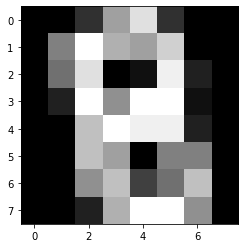

In [19]:
plt.imshow(X[500].reshape((8,8)), cmap='gray')

In [32]:
clf = LogisticRegression(max_iter=10000)
clf.fit(xtr, ytr)

LogisticRegression(max_iter=10000)

In [33]:
clf.predict(xte[:10]), yte[:10]

(array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0]), array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0]))

In [35]:
print(metrics.classification_report(yte, clf.predict(xte)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.92      0.97      0.95        63
           2       1.00      1.00      1.00        53
           3       0.98      0.98      0.98        58
           4       0.97      0.96      0.96        67
           5       0.99      0.99      0.99        68
           6       1.00      0.96      0.98        52
           7       1.00      0.97      0.98        59
           8       0.89      0.92      0.91        63
           9       0.96      0.96      0.96        53

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



In [38]:
metrics.confusion_matrix(yte, clf.predict(xte))

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 64,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 67,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 50,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 57,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 58,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 51]])

In [52]:
def draw_samples(X, ytrue, ypred):
    plt.subplots(5, 4, figsize=(20,20))
    for i in range(len(X)):
        plt.subplot(5, 4, i+1)
        plt.imshow(X[i].reshape((8,8)), cmap='gray')
        plt.title(f"yt = {ytrue[i]} yp = {ypred[i]}")

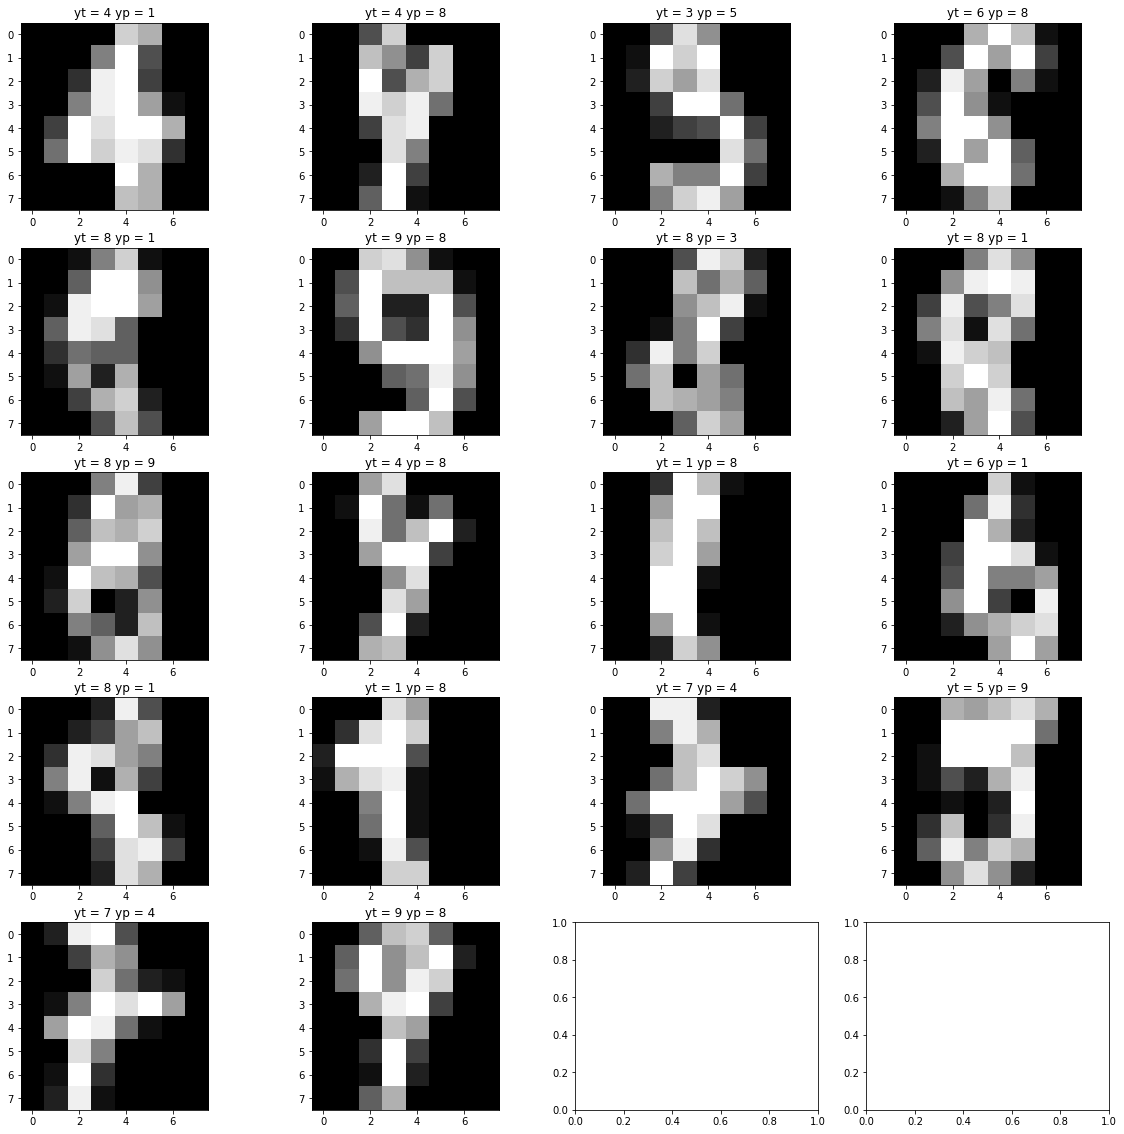

In [53]:
ypred = clf.predict(xte)
mask = yte != ypred
draw_samples(xte[mask,:], yte[mask], ypred[mask])

In [48]:
mask

True